In [1]:
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
patches_csv_path = "/mnt/SSDData/pdata/processed/patches_512.csv"

In [3]:
df = pd.read_csv(patches_csv_path)

In [4]:
df.shape[0] / 10000

257.6729

In [5]:
df.groupby('data_provider').count()

,image_id,isup_grade,gleason_score,y,x,label0,label1,label2,label3,label4,label5
data_provider,,,,,,,,,,,
karolinska,1119543,1119543,1119543,1119543,1119543,1119543,1119543,1119543,1119543,1119543,1119543
radboud,1457186,1457186,1457186,1457186,1457186,1457186,1457186,1457186,1457186,1457186,1457186


In [6]:
df[df['data_provider'] == 'karolinska'].groupby('isup_grade').count()

,image_id,data_provider,gleason_score,y,x,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,,,,,,
0,390462,390462,390462,390462,390462,390462,390462,390462,390462,390462,390462
1,369335,369335,369335,369335,369335,369335,369335,369335,369335,369335,369335
2,138821,138821,138821,138821,138821,138821,138821,138821,138821,138821,138821
3,65326,65326,65326,65326,65326,65326,65326,65326,65326,65326,65326
4,99424,99424,99424,99424,99424,99424,99424,99424,99424,99424,99424
5,56175,56175,56175,56175,56175,56175,56175,56175,56175,56175,56175


In [7]:
df[df['data_provider'] == 'radboud'].groupby('isup_grade').count()

,image_id,data_provider,gleason_score,y,x,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,,,,,,
0,293088,293088,293088,293088,293088,293088,293088,293088,293088,293088,293088
1,225636,225636,225636,225636,225636,225636,225636,225636,225636,225636,225636
2,198804,198804,198804,198804,198804,198804,198804,198804,198804,198804,198804
3,254215,254215,254215,254215,254215,254215,254215,254215,254215,254215,254215
4,203872,203872,203872,203872,203872,203872,203872,203872,203872,203872,203872
5,281571,281571,281571,281571,281571,281571,281571,281571,281571,281571,281571


In [8]:
df[df['data_provider'] == 'karolinska']['label0'].sum()

549723.5294494629

In [9]:
df[df['data_provider'] == 'karolinska']['label1'].sum()

419386.23165130615

In [10]:
df[df['data_provider'] == 'karolinska']['label2'].sum()

150433.23889923096

In [11]:
df[df['data_provider'] == 'karolinska']['label3'].sum()

0.0

In [12]:
df[df['data_provider'] == 'karolinska'].groupby('isup_grade')[[f'label{i}' for i in range(6)]].sum()

,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,
0,156822.581947,233639.418053,0.000000,0.0,0.0,0.0
1,204723.677643,115962.348625,48648.973732,0.0,0.0,0.0
2,75164.029778,31173.296535,32483.673687,0.0,0.0,0.0
3,34316.908569,11025.116741,19983.974689,0.0,0.0,0.0
4,51331.326836,20611.457172,27481.215992,0.0,0.0,0.0
5,27365.004677,6974.594524,21835.400799,0.0,0.0,0.0


In [13]:
df[df['data_provider'] == 'radboud'].groupby('isup_grade')[[f'label{i}' for i in range(6)]].sum()

,label0,label1,label2,label3,label4,label5
isup_grade,,,,,,
0,197719.336090,85034.240402,10334.423508,0.000000,0.000000,0.000000
1,135521.577148,75205.695999,5054.923248,9853.802521,0.001083,0.000000
2,114831.331924,65801.978119,2753.085205,10485.587250,4932.017502,0.000000
3,143929.067307,86525.848083,3749.667023,5199.027161,14811.390427,0.000000
4,120581.006638,67816.954178,2591.484192,963.889404,10739.215149,1179.450439
5,160412.530472,98617.650589,2434.898499,0.000000,12913.173721,7192.746719


In [14]:
df_g = df.groupby('image_id')

In [18]:
patches_per_id  = df_g.count()['data_provider'].values

In [19]:
patches_per_id.min(), patches_per_id.max()

(8, 1101)

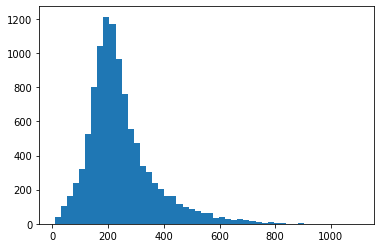

In [21]:
plt.hist(patches_per_id, bins=50);

In [25]:
min_y_x = df_g.min()[['y', 'x']].values
max_y_x = df_g.max()[['y', 'x']].values

In [27]:
size_y_x = max_y_x - min_y_x

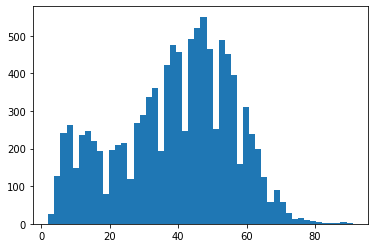

In [28]:
plt.hist(size_y_x[:, 0], bins=50);

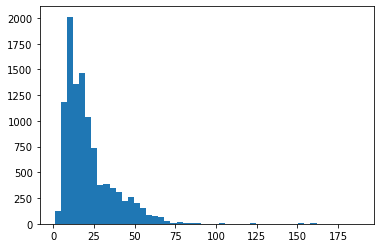

In [29]:
plt.hist(size_y_x[:, 1], bins=50);

In [31]:
64*64

4096

In [32]:
64*64 / 16

256.0